In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from scipy. stats import pearsonr
import datetime
import scipy.stats as stats
from scipy.stats import chisquare
from datetime import timedelta
import matplotlib as mpl
reg = pd.read_excel('тестовое задание портрет_excel.xlsx', sheet_name = 'регионы')
tst = pd.read_excel('тестовое задание портрет_excel.xlsx')
reg

,код региона,регион
0,10,Алтайский край
1,30,Краснодарский край
2,40,Красноярский край
3,50,Приморский край
4,70,Ставропольский край
...,...,...
78,95,Республика Хакасия
79,96,Чеченская Республика*
80,97,Чувашская Республика - Чувашия
81,98,Республика Саха (Якутия)


In [2]:
# Построить портрет клиента с использованием средств визуализации, оформить в виде презентации с выводами.
# Выбор средства построения и визуализации, например, MS Office, Python, BI – на усмотрение кандидата.

In [3]:
tst = tst.rename(columns={'№':'id'})

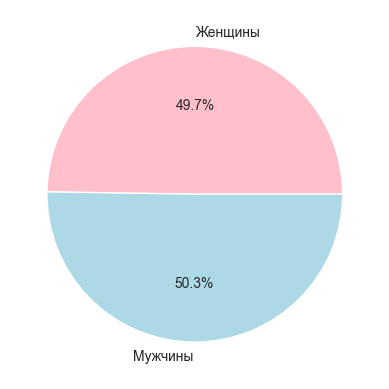

In [4]:
gender = tst['пол']
k=0
for i in range(999):
    if gender[i]==1:
        k = k + 1
# print(k)
cl_1=np.ones(497)
cl_0=np.zeros(502)
x, y = 497, 502
fig, ax = plt.subplots()
ax.pie((x, y), labels=('Женщины', 'Мужчины'), autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.show()

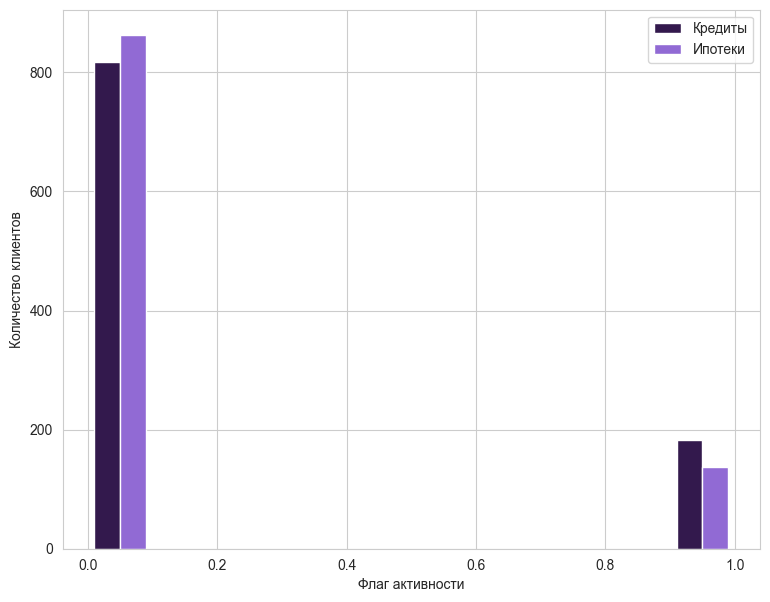

In [5]:
fig, ax = plt.subplots(figsize=(9,7))
ax.hist([tst['флаг активности потреб кредиты'],tst['флаг активности ипотека']], label=['Кредиты','Ипотеки'], color=['#33194d','#916ad4'])
# ax.hist(tst['флаг активности ипотека'], label='Ипотеки', histtype='barstacked', stacked=True, alpha = 0.5)
plt.xlabel('Флаг активности')
plt.ylabel('Количество клиентов')
ax.legend()

In [6]:
cr0_p = []
cr1_p = []
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==1):
        cr1_p.append(tst['пакет обслуживания, уровень'][i])
    else:
        cr0_p.append(tst['пакет обслуживания, уровень'][i])
len(cr1_p)

182

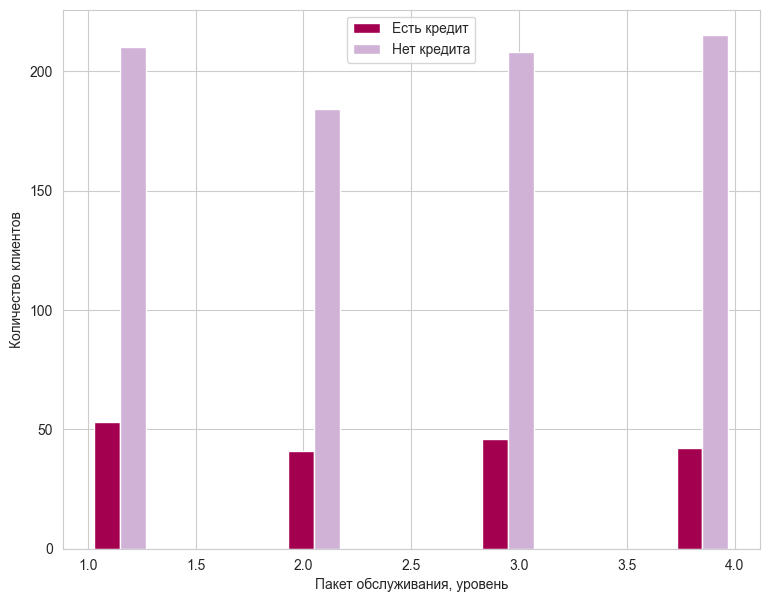

In [7]:
fig, ax = plt.subplots(figsize=(9,7))
ax.hist([cr1_p,cr0_p], label=['Есть кредит','Нет кредита'], color=['#a3004f','#d0b2d6'])
# ax.hist(tst['флаг активности ипотека'], label='Ипотеки', histtype='barstacked', stacked=True, alpha = 0.5)
plt.xlabel('Пакет обслуживания, уровень')
plt.ylabel('Количество клиентов')
ax.legend(loc='upper center')

In [8]:
f_m=[]
f_w=[]
for i in range(999):
    if(tst['пол'][i]=='м'):
        f_m.append(tst['флаг активности'][i])
    else:
        f_w.append(tst['флаг активности'][i])

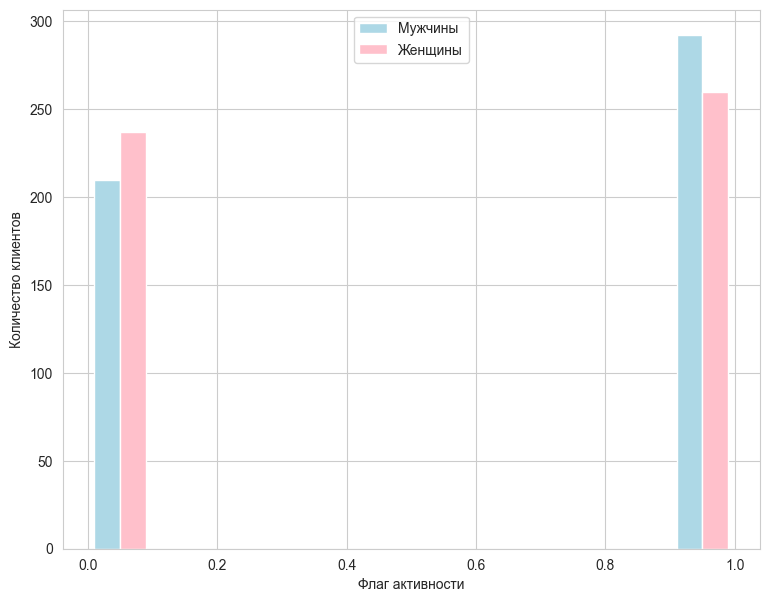

In [86]:
fig, ax = plt.subplots(figsize=(9,7))
ax.hist([f_m,f_w], label=['Мужчины','Женщины'], color=[ 'lightblue', 'pink'])
# ax.hist(tst['флаг активности ипотека'], label='Ипотеки', histtype='barstacked', stacked=True, alpha = 0.5)
plt.xlabel('Флаг активности')
plt.ylabel('Количество клиентов')
ax.legend(loc='upper center')

In [10]:
ip0_p = []
ip1_p = []
for i in range(999):
    if(tst['флаг активности ипотека'][i]==1):
        ip1_p.append(tst['пакет обслуживания, уровень'][i])
    else:
        ip0_p.append(tst['пакет обслуживания, уровень'][i])

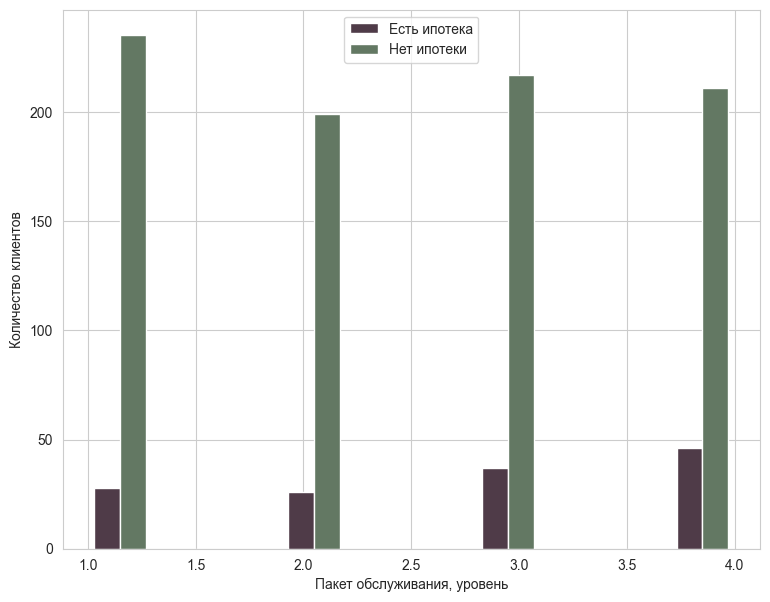

In [11]:
fig, ax = plt.subplots(figsize=(9,7))
ax.hist([ip1_p,ip0_p], label=['Есть ипотека','Нет ипотеки'], color=['#4f3b48','#637863'])
# ax.hist(tst['флаг активности ипотека'], label='Ипотеки', histtype='barstacked', stacked=True, alpha = 0.5)
plt.xlabel('Пакет обслуживания, уровень')
plt.ylabel('Количество клиентов')
ax.legend(loc='upper center')

In [12]:
f1_tr = []
f0_tr = []
for i in range(999):
    if(tst['флаг активности'][i]==1):
        f1_tr.append(tst['объем транзакций в декабре 2022, руб.'][i])
    else:
        f0_tr.append(tst['объем транзакций в декабре 2022, руб.'][i])

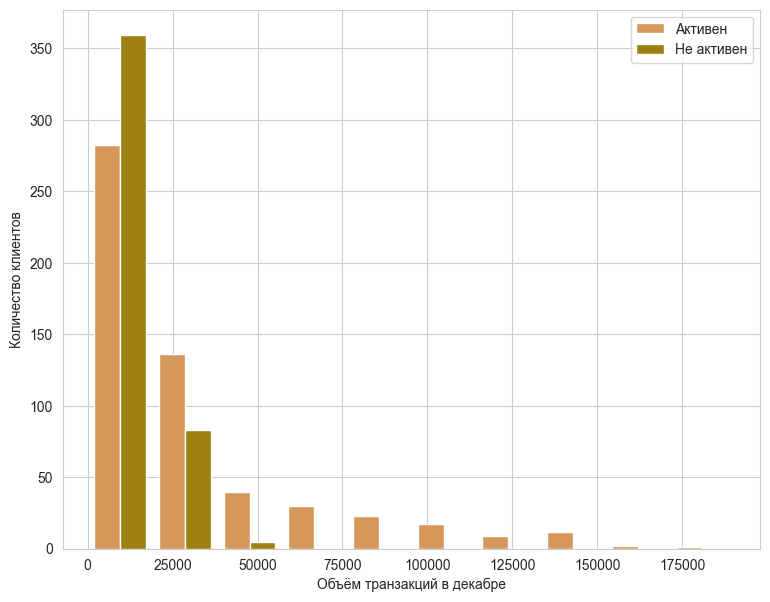

In [13]:
fig, ax = plt.subplots(figsize=(9,7))
ax.hist([f1_tr,f0_tr], label=['Активен','Не активен'], color=['#d6985a','#9c8011'])
# ax.hist(tst['флаг активности ипотека'], label='Ипотеки', histtype='barstacked', stacked=True, alpha = 0.5)
plt.xlabel('Объём транзакций в декабре')
plt.ylabel('Количество клиентов')
ax.legend(loc='upper right')

In [14]:
db1_tr = []
db0_tr = []
for i in range(999):
    if(tst['флаг активности дебетовые карты'][i]==1):
        db1_tr.append(tst['объем транзакций в декабре 2022, руб.'][i])
    else:
        db0_tr.append(tst['объем транзакций в декабре 2022, руб.'][i])

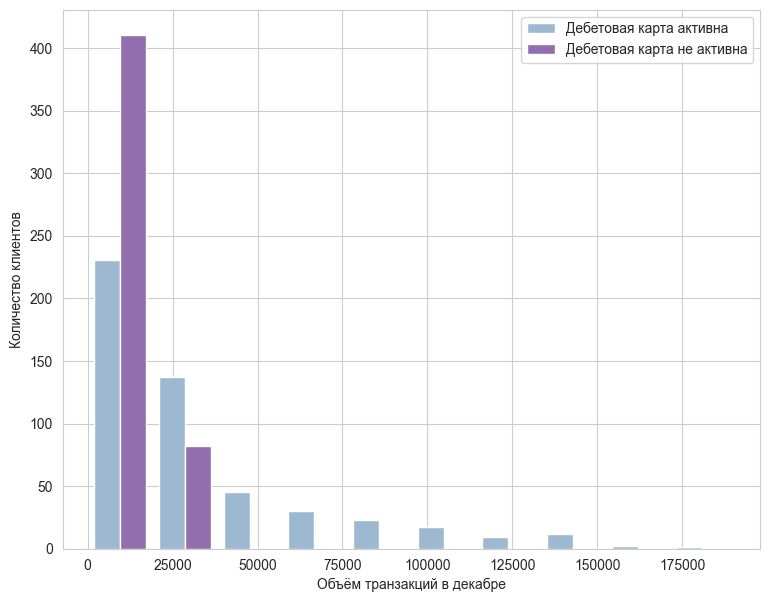

In [15]:
fig, ax = plt.subplots(figsize=(9,7))
ax.hist([db1_tr,db0_tr], label=['Дебетовая карта активна','Дебетовая карта не активна'], color=['#9db9d1','#926eae'])
# ax.hist(tst['флаг активности ипотека'], label='Ипотеки', histtype='barstacked', stacked=True, alpha = 0.5)
plt.xlabel('Объём транзакций в декабре')
plt.ylabel('Количество клиентов')
ax.legend(loc='upper right')

In [16]:
def chi2(x,y):
    crosstab = pd.crosstab(x, y)
    return (stats.chi2_contingency(crosstab).pvalue)
chi2(tst['флаг активности ипотека'], tst['пакет обслуживания, уровень'])

0.07392951474435319

In [17]:
def krus(x_d,y_n, dff):
    g = [k[1][y_n] for k in dff.groupby(x_d)]
    return stats.kruskal(*g).pvalue
krus('флаг активности дебетовые карты', 'объем транзакций в декабре 2022, руб.', tst)

2.362308539756976e-41

In [18]:
def corr_test(x,y):
    return pearsonr(x,y).pvalue

In [19]:
k = len(tst[tst['флаг активности потреб кредиты']==1])
k0 = len(tst[tst['флаг активности потреб кредиты']==0])
print('Количество людей, у которых есть кредиты:', k)
print('Количество людей, у которых нет кредитов:', k0)

trz1 = []
trz0 = []
for i in range(999):
    n= 0
    k=0
    if(tst['флаг активности потреб кредиты'][i] == 1):
        n +=1
        trz1.append(tst['объем транзакций в декабре 2022, руб.'][i])
        p = np.sum(tst['объем транзакций в декабре 2022, руб.'][i])/n
    else:
        k+=1
        trz0.append(tst['объем транзакций в декабре 2022, руб.'][i])
        p0 = np.sum(tst['объем транзакций в декабре 2022, руб.'][i])/k
print('Средний объем транзакций людей, у которых есть кредиты =',p)
print('Средний объем транзакций людей, у которых нет кредитов =',p0)
print('Показатель = ' + str(p/p0) + ' показывает, что у людей, не имеющих кредитов, объём транзакций примерно на 13% выше, чем у людей с кредитами')

Количество людей, у которых есть кредиты: 182
Количество людей, у которых нет кредитов: 817
Средний объем транзакций людей, у которых есть кредиты = 13267.0
Средний объем транзакций людей, у которых нет кредитов = 9741.6
Показатель = 1.3618912704278558 показывает, что у людей, не имеющих кредитов, объём транзакций примерно на 13% выше, чем у людей с кредитами


In [20]:
for i in range(999):
    n= 0
    k=0
    if(tst['флаг активности потреб кредиты'][i] == 1 and tst['флаг активности ипотека'][i] == 1):
        n +=1
        p = np.sum(tst['объем транзакций в декабре 2022, руб.'][i])/n
    else:
        k+=1
        p0 = np.sum(tst['объем транзакций в декабре 2022, руб.'][i])/k
print('Средний объем транзакций людей, у которых есть кредиты и ипотеки =',p)
print('Средний объем транзакций людей, у которых нет кредитов и нет ипотек =',p0)
print('Показатель = ' + str(p/p0) + ' показывает, что у людей, не имеющих кредитов и ипотек, объём транзакций примерно на 56% выше, чем у людей с кредитами и ипотеками')

Средний объем транзакций людей, у которых есть кредиты и ипотеки = 7536.0
Средний объем транзакций людей, у которых нет кредитов и нет ипотек = 13267.0
Показатель = 0.5680259289967589 показывает, что у людей, не имеющих кредитов и ипотек, объём транзакций примерно на 56% выше, чем у людей с кредитами и ипотеками


In [21]:
tst['дата рождения'] = pd.to_datetime(tst['дата рождения']).dt.date
t1 = []
dt1 = []
t0 = []
dt0 = []
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i] == 1):
        t1.append(tst['флаг активности потреб кредиты'][i])
        dt1.append(tst['дата рождения'][i])
    else:
        t0.append(tst['флаг активности потреб кредиты'][i])
        dt0.append(tst['дата рождения'][i])

In [22]:
d = datetime.date(2022, 12, 31)
age1 = []
age0 = []
for i in range(len(dt1)):
    age1.append(((d - dt1[i])/360).days)
dtt = pd.DataFrame({'age':age1, 'kredit':t1})
sr = np.mean(age1)
for i in range(len(dt0)):
    age0.append(((d - dt0[i])/360).days)
sr0 = np.mean(age0)
print('Средний возраст, имеющих кредит:',sr)
print('Средний возраст, не имеющих кредит:',sr0)

Средний возраст, имеющих кредит: 57.532967032967036
Средний возраст, не имеющих кредит: 58.50550795593635


In [23]:
d = datetime.date(2022, 12, 31)
age = []
for i in range(999):
    age.append(((d - tst['дата рождения'][i])/360).days)

In [24]:
tst['дата открытия первого договора'] = pd.to_datetime(tst['дата открытия первого договора']).dt.date
dd = datetime.date(2022, 12, 31)
dog = []
for i in range(999):
    dog.append(((dd - tst['дата открытия первого договора'][i])/360).days)

In [25]:
tst1 = tst.copy()
tst1['возраст'] = age
tst1['лет с договора'] = dog

In [26]:
m = np.zeros([11,11])
naz = [
 'флаг активности',
 'флаг активности дебетовые карты',
 'флаг активности депозиты',
 'флаг активности ипотека',
 'флаг активности потреб кредиты', 'пакет обслуживания, уровень',
 'пол',
 'код региона',
 'объем транзакций в декабре 2022, руб.',
    'возраст',
 'лет с договора']
for i in range(8):
    for j in range(i):
        p = chi2(tst1[naz[i]],tst1[naz[j]])
        m[i,j] = p
        m[j,i] = p
for i in range(8):
    for j in range(8,11):
        p = krus(naz[i],naz[j], tst1)
        m[i,j] = p
        m[j,i] = p
for i in range(8,11):
    for j in range(8,i):
        p = corr_test(tst1[naz[i]], tst1[naz[j]])
        m[i,j] = p
        m[j,i] = p

In [27]:
pearsonr(tst1['код региона'],tst1['лет с договора']).pvalue

0.060859565964092505

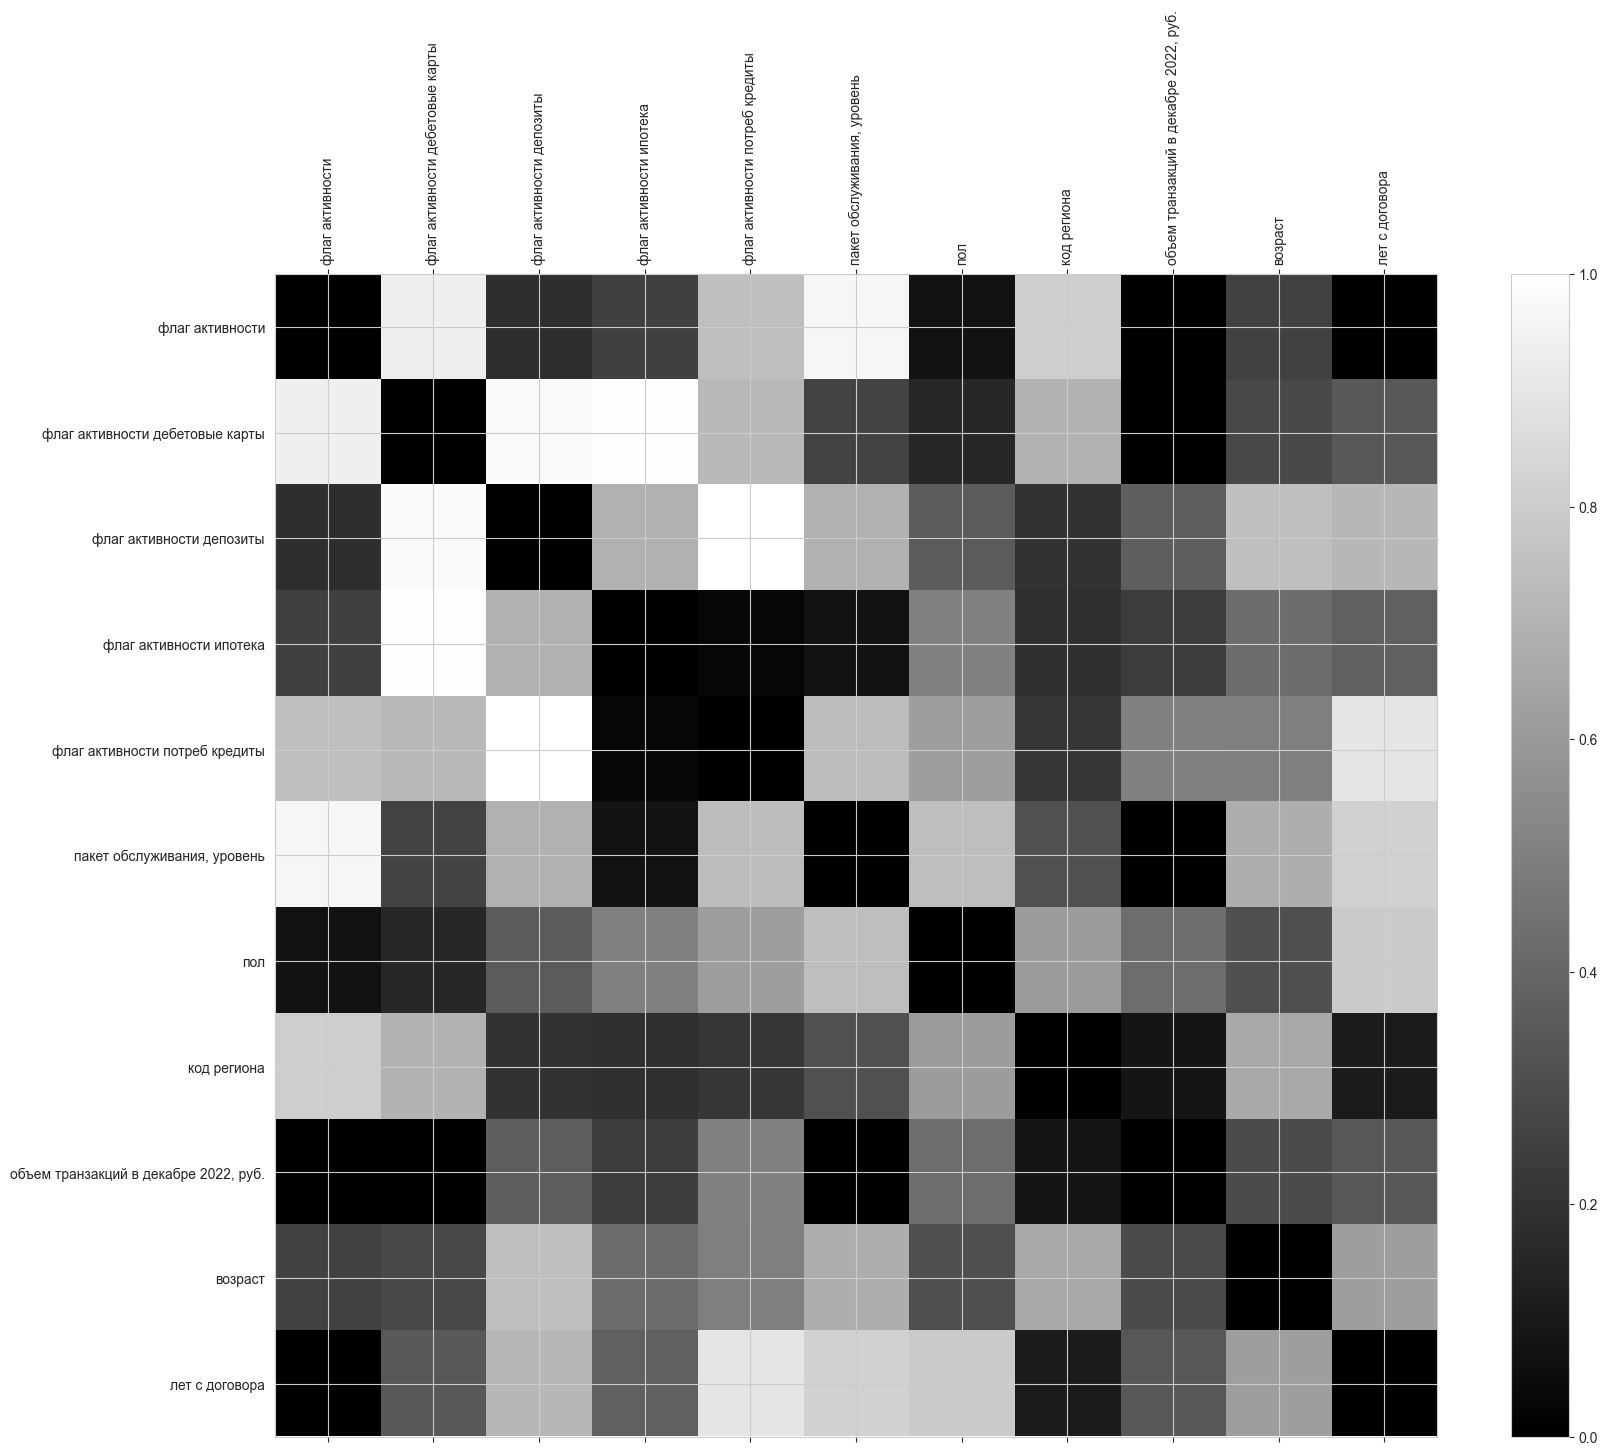

In [28]:
f = plt.figure(figsize=(19,15))
plt.matshow(m, fignum=f.number, cmap = mpl.colormaps['gist_gray'])
plt.xticks(range(11), naz, rotation = 90)
plt.yticks(range(11), naz)
plt.colorbar()

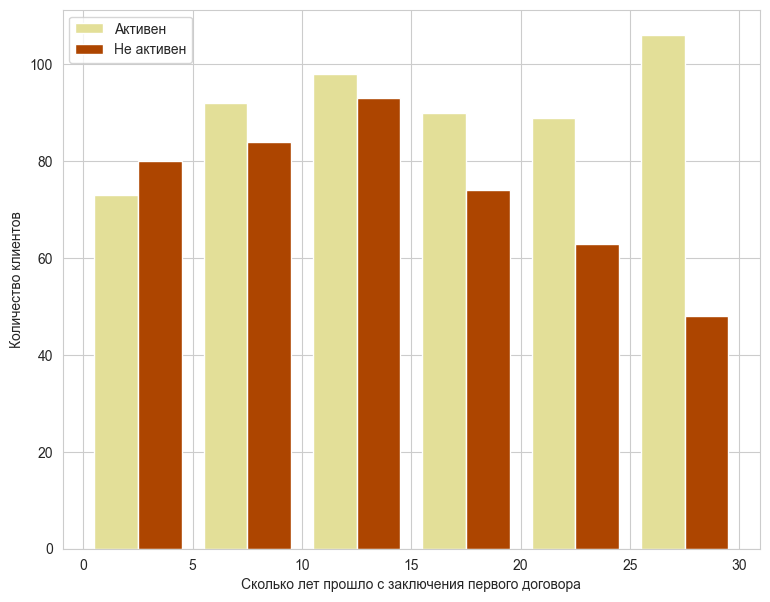

In [29]:
ac1_d = []
ac0_d = []
for i in range(999):
    if (tst1['флаг активности'][i] == 1):
        ac1_d.append(tst1['лет с договора'][i])
    else:
        ac0_d.append(tst1['лет с договора'][i])
fig, ax = plt.subplots(figsize=(9, 7))
ax.hist([ac1_d, ac0_d], label=['Активен', 'Не активен'], color=['#e3df98', '#ad4500'], bins=range(0,35,5))
# ax.hist(tst['флаг активности ипотека'], label='Ипотеки', histtype='barstacked', stacked=True, alpha = 0.5)
plt.xlabel('Сколько лет прошло с заключения первого договора')
plt.ylabel('Количество клиентов')
ax.legend(loc='upper left')

Text(0, 0.5, 'Количество регионов')

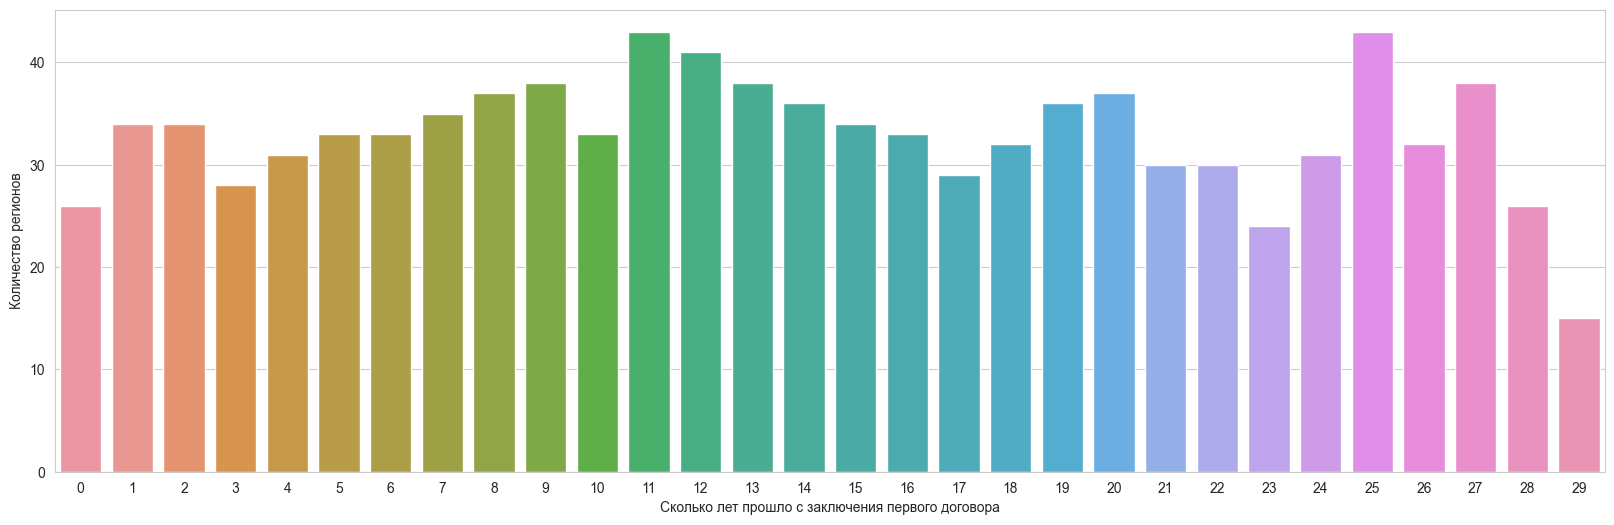

In [30]:
x = tst1.groupby('лет с договора')['код региона'].count()
x1 = x.drop(-1)
x1.sort_values(inplace=True)
xorder = x1.index.values
xx = x1.values
tst1.groupby('код региона', as_index=False)
# seaborn.set(rc={'figure.figsize':(12,10)})
fig, ax = plt.subplots(figsize=(20, 6))
seaborn.barplot(x=xorder,
                y=xx,
                data=tst1, errorbar=None)

plt.xlabel('Сколько лет прошло с заключения первого договора')
plt.ylabel('Количество регионов')

Text(0, 0.5, 'Объем транзакций в декабре')

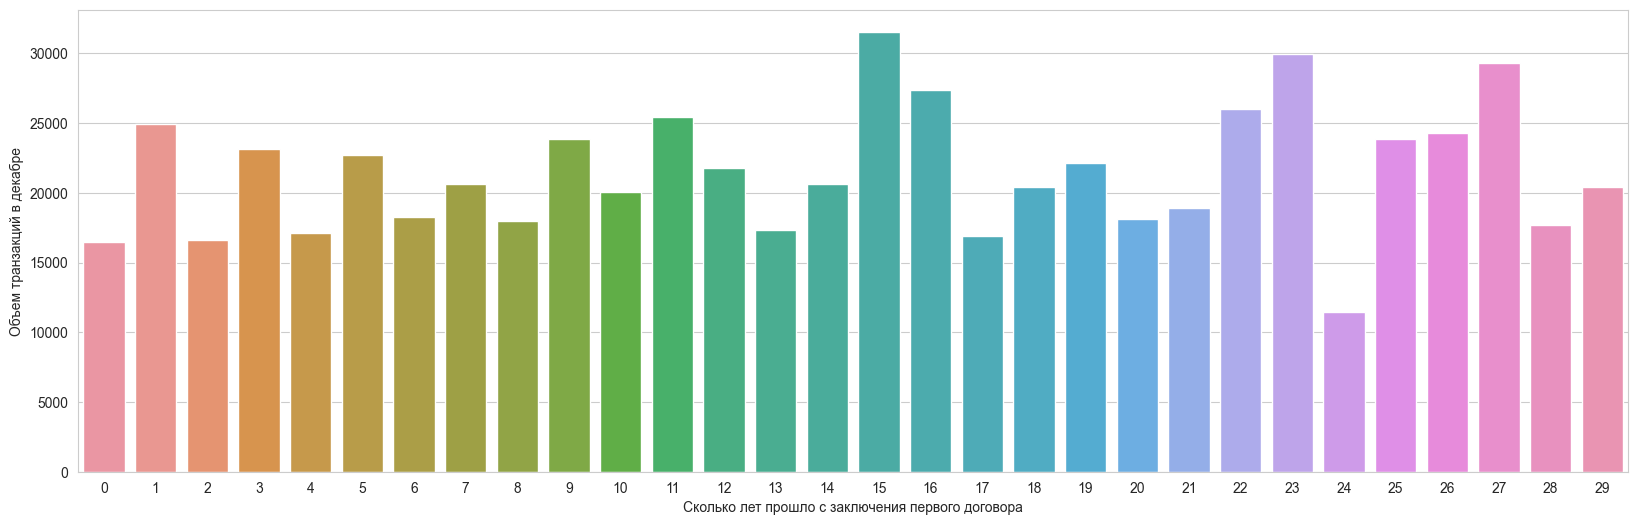

In [31]:
x = tst1.groupby('лет с договора')['объем транзакций в декабре 2022, руб.'].mean()
x1 = x.drop(-1)
x1.sort_values(inplace=True)
xorder = x1.index.values
xx = x1.values
tst1.groupby('код региона', as_index=False)
# seaborn.set(rc={'figure.figsize':(12,10)})
fig, ax = plt.subplots(figsize=(20, 6))
seaborn.barplot(x=xorder,
                y=xx,
                data=tst1,errorbar=None)

plt.xlabel('Сколько лет прошло с заключения первого договора')
plt.ylabel('Объем транзакций в декабре')

Text(0, 0.5, 'Количество клиентов, взявших кредит')

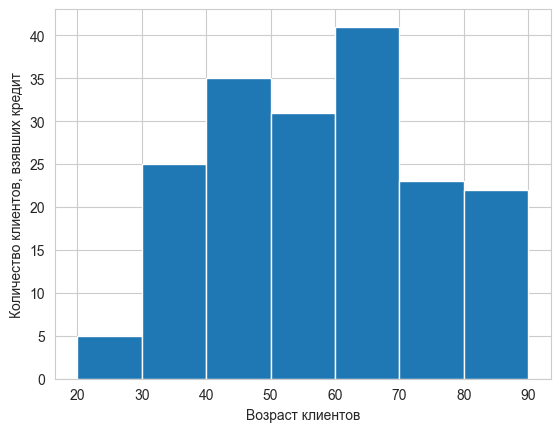

In [32]:
plt.hist(age1,bins=[20,30,40,50,60,70,80,90])

plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов, взявших кредит')
#По графику можно сделать вывод, что количество клиентов, взявших кредит, больше в диапазоне возраста от 55 лет до 70 лет.

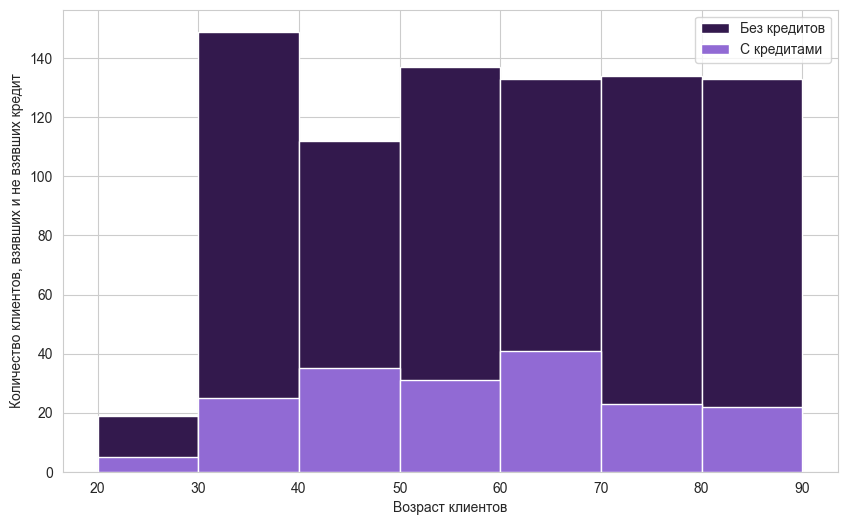

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(age0, bins=range(20,100,10), label='Без кредитов', color='#33194d', histtype='barstacked', stacked=True)
ax.hist(age1, bins=range(20,100,10), label='С кредитами', color='#916ad4', histtype='barstacked', stacked=True)
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов, взявших и не взявших кредит')
ax.legend()
#
#По графику можно сделать вывод, что количество клиентов, не имеющих кредит, больше возрасте 35-38 лет, 50-67 лет и 67-73 года.
# Можно предположить, что:
# 1. Клиенты в возрасте от 35 до 38 лет скорее всего не нуждаются в кредитах, что может указывать на то, что у них на данный момент достаточный доход и стабильная финансовая ситуация.
#
# 2. Клиенты в возрасте от 50 до 67 лет, возможно имеют достаточное количество сбережений и стабильный доход в связи с пенсией, что делает их менее зависимыми от кредитов.
#
# 3. Клиенты старше 67 лет, вероятно имеют недостаточный доход и возможно у них нет возможности брать кредиты из-за высокого риска несвоевременного погашения долга.

Text(0, 0.5, 'Количество клиентов, взявших кредит')

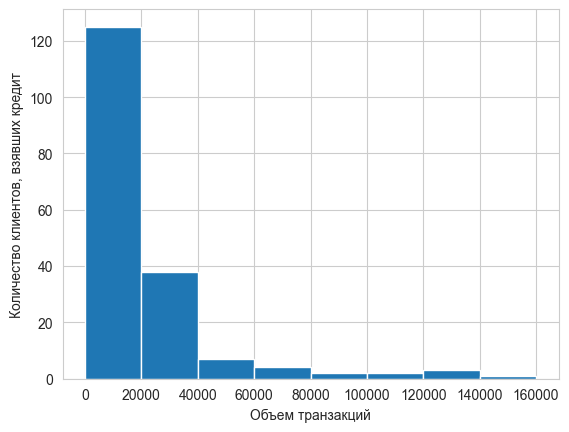

In [34]:
plt.hist(trz1, bins=range(0, 180000, 20000))
plt.xlabel('Объем транзакций')
plt.ylabel('Количество клиентов, взявших кредит')
#У большего числа клиентов, имеющих кредиты, объем транзакций колеблется от 0 до 10000 руб, от 10к до 22к и от 24к до 35к.

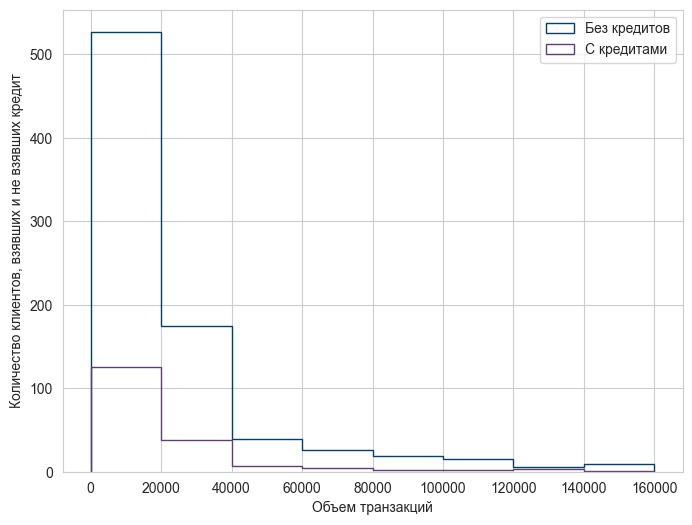

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(trz0, bins=range(0, 180000, 20000), label='Без кредитов', color='#00406b', histtype='step')
ax.hist(trz1, bins=range(0, 180000, 20000), label='С кредитами', color='#5d4073', histtype='step')
plt.xlabel('Объем транзакций')
plt.ylabel('Количество клиентов, взявших и не взявших кредит')
ax.legend()
#Можно сказать, что клиентов с кредитами почти в 8 раз меньше, чем клиентов без. Объём транзакций также значительно превышает. У клиентов без кредитов объём транзакций от 0 до 35к руб, у клиентов с кредитами - от 0 до 35к руб.
# Если у клиентов без кредитов объем транзакций выше, чем у клиентов с кредитами, то можно предположить, что эти клиенты предпочитают использовать свои собственные средства для оплаты, а не брать кредиты. Возможно, они более финансово стабильны и могут позволить себе такой подход, или имеют доступ к другим источникам финансирования. Однако, нужно учитывать, что объем транзакций сам по себе не является главным показателем успешности финансового продукта, так как важно также учитывать стоимость и тип транзакций, а также другие факторы, влияющие на доходность

In [88]:
gender_m_1 = []
gender_w_0 = []
gender_m_0 = []
gender_w_1 = []
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i] == 1 and tst['пол'][i] == 'м'):
        gender_m_1.append(tst['пол'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i] == 0 and tst['пол'][i] == 'ж'):
        gender_w_0.append(tst['пол'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i] == 0 and tst['пол'][i] == 'м'):
        gender_m_0.append(tst['пол'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i] == 1 and tst['пол'][i] == 'ж'):
        gender_w_1.append(tst['пол'][i])
print((len(gender_m_1)/(len(gender_m_1)+len(gender_m_0)))*100)

18.92430278884462


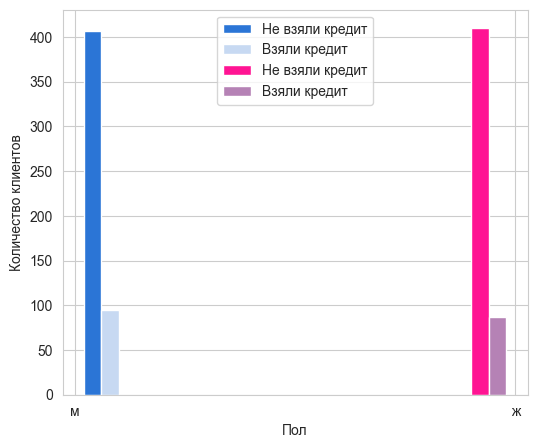

In [37]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.hist([gender_m_0,gender_m_1,gender_w_0,gender_w_1], label=['Не взяли кредит','Взяли кредит', 'Не взяли кредит', 'Взяли кредит'], bins=5, color=['#2b75d6','#c7d9f2','#ff1493', '#b582b5'])
# ax.hist(gender_w_0, label='Не взяли кредит', histtype='step', stacked=True)
# ax.hist(gender_m_1, label='Взяли кредит', histtype='step', stacked=True)
# ax.hist(gender_w_1, label='Взяли кредит', histtype='step', stacked=True)
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
ax.legend(loc='upper center')
#Жещин, не взявших кредит, немного больше, чем мужчин. Мужчин, взявших кредит, немного больше, чем женщин.

In [38]:
pol = []
for i in range(999):
    if(tst['пол'][i]=='м'):
        pol.append(1)
    else:
        pol.append(0)

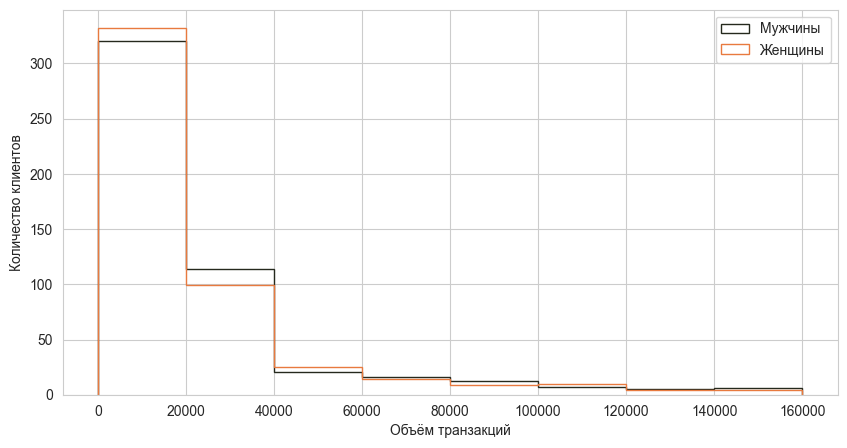

In [39]:
tr_w = []
tr_m = []
for i  in range(999):
    if(tst['пол'][i] == 'ж'):
        tr_w.append(tst['объем транзакций в декабре 2022, руб.'][i])
    else:
        tr_m.append(tst['объем транзакций в декабре 2022, руб.'][i])
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(tr_m, bins=range(0, 180000, 20000), label='Мужчины', color='#25291d', histtype='step', stacked=True)
ax.hist(tr_w, bins=range(0, 180000, 20000), label='Женщины', color='#e87a3f', histtype='step', stacked=True)
plt.xlabel('Объём транзакций')
plt.ylabel('Количество клиентов')
ax.legend()
#По графику видно, что объём транзакций примерно одинаковый и для женщин, и для мужчин. Однако начиная с объёма транзакций примерно равным 140к, на графике остаются только мужчины.
# Это может быть связано с различиями в гендерных ролях, когда мужчины считаются ответственными за основные финансовые решения и заработок, а женщины – за уход за домом и семьей. Однако этот вывод может быть не точным и не отображать реальную ситуацию, поскольку существуют различные факторы, влияющие на объём финансовых транзакций, такие как уровень дохода, профессиональная деятельность, образование и т. д.

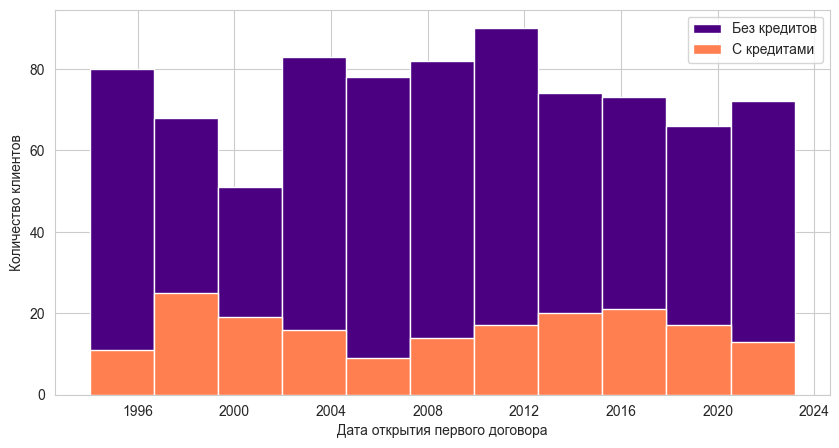

In [40]:
dog0 = []
dog1 = []
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i] == 1):
        dog1.append(tst['дата открытия первого договора'][i])
    else:
        dog0.append(tst['дата открытия первого договора'][i])
fig, ax = plt.subplots(figsize=(10, 5))
tst['дата открытия первого договора'] = pd.to_datetime(tst['дата открытия первого договора']).dt.date
d = pd.date_range(start=min(tst['дата открытия первого договора']),end=max(tst['дата открытия первого договора']),periods=12)

ax.hist(dog0, bins=d, label='Без кредитов', color='indigo',histtype='barstacked', stacked=True)
ax.hist(dog1, bins=d, label='С кредитами', color='coral', histtype='barstacked', stacked=True)
plt.xlabel('Дата открытия первого договора')
plt.ylabel('Количество клиентов')
ax.legend()



#Большее число клиентов с кредитами, заключивших первый договор примерно в 1998 году. Примерно в этом же году самое большое количество клиентов, не имеющих кредитов, заключили первый договор.
#Дата открытия первого договора может указывать на то, насколько долго клиент уже пользуется услугами банка, и можно оценить его лояльность и предложить дополнительные услуги

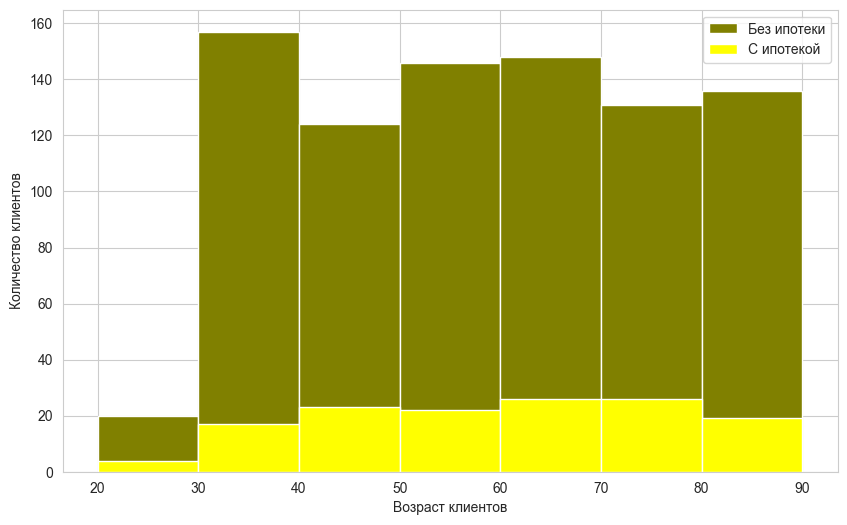

In [41]:
tst['дата рождения'] = pd.to_datetime(tst['дата рождения']).dt.date
dt1 = []
dt0 = []
for i in range(999):
    if(tst['флаг активности ипотека'][i] == 1):
        dt1.append(tst['дата рождения'][i])
    else:
        dt0.append(tst['дата рождения'][i])
d = datetime.date(2022, 12, 31)
age1 = []
age0 = []
for i in range(len(dt1)):
    age1.append(((d - dt1[i])/360).days)
sr = np.mean(age1)
for i in range(len(dt0)):
    age0.append(((d - dt0[i])/360).days)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(age0, bins=range(20,100,10), label='Без ипотеки', color='olive', histtype='barstacked', stacked=True)
ax.hist(age1, bins=range(20,100,10), label='С ипотекой', color='yellow', histtype='barstacked', stacked=True)
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов')
ax.legend()
#Больше всего ипотеку имеют клиенты от 50-ти лет. Можно сказать, что клиенты в возрасте от 50 лет уже имеют определенный жизненный опыт и, вероятно, более устойчивые финансовые возможности. Они уже успели сберечь некоторую сумму денег, которую они могут использовать для покупки жилья или приобретения ипотеки. Также не стоит забывать, что многие люди принимают решение покупать недвижимость после того, как выходят на пенсию и имеют больше времени и возможностей заботиться о своем жилье.

4.37956204379562


([<matplotlib.patches.Wedge at 0x2a24ed9c490>,
 [Text(1.0896046635076269, 0.1508697360719882, 'от 20 до 30 лет'),
  Text(0.8656025814656394, 0.6787725472940264, 'от 31 до 40 лет'),
  Text(-0.11330874403320325, 1.0941485861278706, 'от 41 до 50 лет'),
  Text(-0.45278067556829243, -1.0024917255678079, 'от 51 года')],
 [Text(0.5943298164587055, 0.08229258331199354, '4.4%'),
  Text(0.47214686261762145, 0.37023957125128704, '12.4%'),
  Text(-0.06180476947265631, 0.5968083197061111, '19.7%'),
  Text(-0.24697127758270493, -0.5468136684915315, '63.5%')])

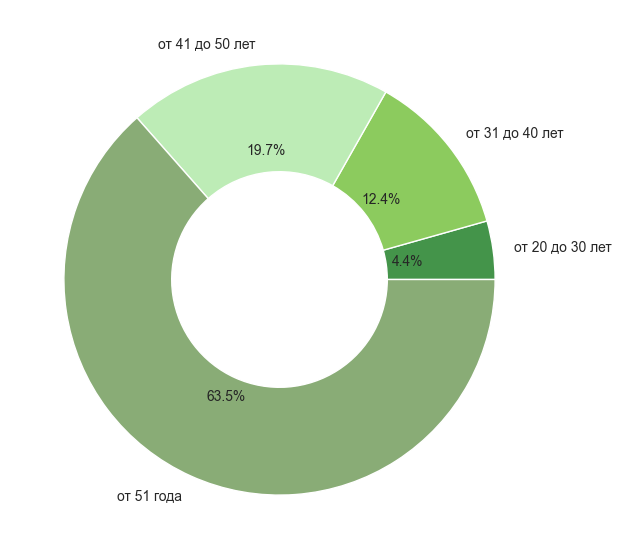

In [65]:
agem = []
agev = []
agevv = []
ages = []
for i in range(len(age1)):
    if(age1[i]<=30):
        agem.append(age1[i])
for i in range(len(age1)):
    if(age1[i]>=31 and age1[i]<=40):
        agev.append(age1[i])
for i in range(len(age1)):
    if(age1[i]>=41 and age1[i]<=50):
        agevv.append(age1[i])
for i in range(len(age1)):
    if(age1[i]>=51):
        ages.append(age1[i])
p = [(len(agem)/len(age1))*100, (len(agev)/len(age1))*100, (len(agevv)/len(age1))*100, (len(ages)/len(age1))*100]
print((len(agem)/len(age1))*100)
fig = plt.figure(figsize =(10, 7))
plt.pie(p, autopct='%1.1f%%', labels=['от 20 до 30 лет', 'от 31 до 40 лет', 'от 41 до 50 лет', 'от 51 года'],colors=['#44944A','#8CCB5E', '#BDECB6', '#89AC76'],  wedgeprops=dict(width=0.5))

In [72]:
w_age_24 = []
m_age_24 = []
w_age_46 = []
m_age_46 = []
w_age_6 = []
m_age_6 = []

for i in range(999):
    if(age[i] >= 20 and age[i] <= 40 and tst['пол'][i] == 'ж'):
        w_age_24.append(age[i])
for i in range(999):
    if(age[i] >= 20 and age[i] <= 40 and tst['пол'][i] == 'м'):
        m_age_24.append(age[i])
for i in range(999):
    if(age[i] >= 41 and age[i] <= 60 and tst['пол'][i] == 'ж'):
        w_age_46.append(age[i])
for i in range(999):
    if(age[i] >= 41 and age[i] <= 60 and tst['пол'][i] == 'м'):
        m_age_46.append(age[i])
for i in range(999):
    if(age[i] >= 61 and tst['пол'][i] == 'ж'):
        w_age_6.append(age[i])
for i in range(999):
    if(age[i] >= 61 and tst['пол'][i] == 'м'):
        m_age_6.append(age[i])
print((len(w_age_24)/len(tst[tst['пол']=='ж']))*100, (len(w_age_46)/len(tst[tst['пол']=='ж']))*100, (len(w_age_6)/len(tst[tst['пол']=='ж']))*100)
print((len(m_age_24)/len(tst[tst['пол']=='м']))*100, (len(m_age_46)/len(tst[tst['пол']=='м']))*100, (len(m_age_6)/len(tst[tst['пол']=='м']))*100)


18.712273641851105 35.01006036217304 46.27766599597585
24.10358565737052 28.884462151394423 47.01195219123506


Text(0, 0.5, 'Количество клиентов')

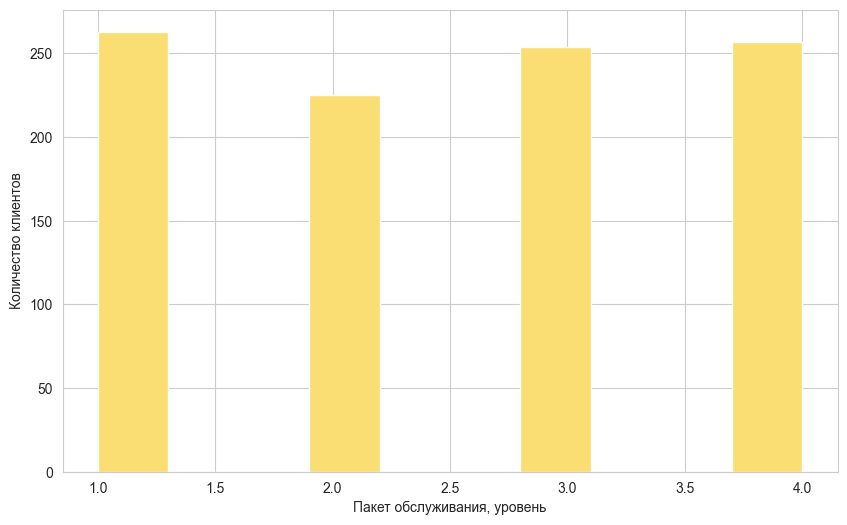

In [42]:

df = pd.DataFrame({'age':age, 'level':tst['пакет обслуживания, уровень']})
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(tst['пакет обслуживания, уровень'], color='#fadd73')
plt.xlabel('Пакет обслуживания, уровень')
plt.ylabel('Количество клиентов')
# df = pd.DataFrame({'age':age, 'active_ip':tst['флаг активности ипотека'],
#                    'act_kr':tst['флаг активности потреб кредиты'], 'act_dep':tst['флаг активности депозиты'],
#                    'act_deb':tst['флаг активности дебетовые карты'], 'level':tst['пакет обслуживания, уровень'],'id_reg':tst['код региона']})
# df.plot(x='level', y='age', kind = 'hist' )
# # seaborn.pairplot(tst, hue='пакет обслуживания, уровень', height=2)
# seaborn.scatterplot(df, x = 'age', y = tst['id'],hue='level', sizes='Freedom')
# plt.xlabel('Возраст')
# plt.ylabel('Клиенты')
#Глядя на график, можно сделать вывод, что среди клиентов много тех, у кого уровень пакета обслуживания равен 1. Большой сгусток имеет уровень 4 в возрасте от 30 до 45 лет и от 60 до 85 лет.
#Из графика можно сделать вывод, что уровень пакета обслуживания 1 наиболее распространен среди клиентов. Кроме того, видны два ярко выраженных сгустка клиентов с уровнем пакета обслуживания 4: первый среди людей в возрасте от 30 до 45 лет, и второй среди людей в возрасте от 60 до 85 лет.

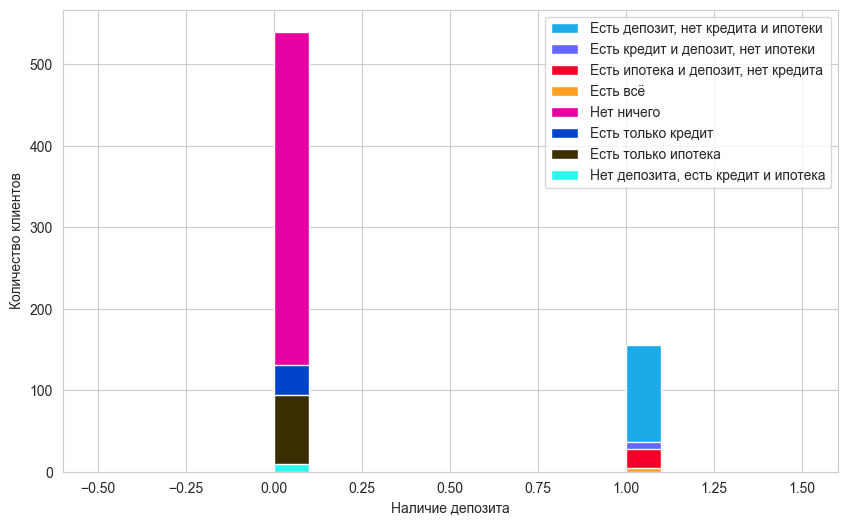

In [43]:
dep0 = []
dep1 = []
dep2 = []
dep3 = []
dep4 = []
dep5 = []
dep6 = []
dep7 = []
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==1 and tst['флаг активности ипотека'][i]==1 and tst['флаг активности депозиты'][i]==0):
        dep0.append(tst['флаг активности депозиты'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==0 and tst['флаг активности ипотека'][i]==0 and tst['флаг активности депозиты'][i]==1):
        dep1.append(tst['флаг активности депозиты'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==1 and tst['флаг активности ипотека'][i]==0 and tst['флаг активности депозиты'][i]==1):
        dep2.append(tst['флаг активности депозиты'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==0 and tst['флаг активности ипотека'][i]==1 and tst['флаг активности депозиты'][i]==1):
        dep3.append(tst['флаг активности депозиты'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==0 and tst['флаг активности ипотека'][i]==1 and tst['флаг активности депозиты'][i]==0):
        dep4.append(tst['флаг активности депозиты'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==1 and tst['флаг активности ипотека'][i]==0 and tst['флаг активности депозиты'][i]==0):
        dep5.append(tst['флаг активности депозиты'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==1 and tst['флаг активности ипотека'][i]==1 and tst['флаг активности депозиты'][i]==1):
        dep6.append(tst['флаг активности депозиты'][i])
for i in range(999):
    if(tst['флаг активности потреб кредиты'][i]==0 and tst['флаг активности ипотека'][i]==0 and tst['флаг активности депозиты'][i]==0):
        dep7.append(tst['флаг активности депозиты'][i])
len(dep7)
#Если у клиента нет депозита, вероятно, у него есть кредит и ипотека
#Если у клиента есть депозит, вероятно, у него нет кредита и ипотеки
#У клиента есть кредит и депозит, но нет ипотеки
#У клиента есть ипотека и депозит, но нет кредита
#У клиента есть только ипотека
#У клиента есть только кредит
#У клиента есть всё
#У клиента нет ничего
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(dep1, histtype='barstacked', stacked=True, label='Есть депозит, нет кредита и ипотеки', color='#1cabe8')
ax.hist(dep2, histtype='barstacked', stacked=True, label='Есть кредит и депозит, нет ипотеки', color='#6666ff')
ax.hist(dep3, histtype='barstacked', stacked=True, label='Есть ипотека и депозит, нет кредита', color='#f50029')
ax.hist(dep6, histtype='barstacked', stacked=True, label='Есть всё', color='#ffa024')
ax.hist(dep7, histtype='barstacked', stacked=True, label='Нет ничего', color='#e600a1')
ax.hist(dep5, histtype='barstacked',  stacked=True, label='Есть только кредит', color='#0044cc')
ax.hist(dep4, histtype='barstacked',  stacked=True, label='Есть только ипотека', color='#3b2e02')
ax.hist(dep0, histtype='barstacked', stacked=True, label='Нет депозита, есть кредит и ипотека', color='#2af7ed')
plt.xlabel('Наличие депозита')
plt.ylabel('Количество клиентов')
ax.legend()

In [94]:
iw1 = []
im1 = []
for i in range(999):
    if(tst['флаг активности дебетовые карты'][i]==1 and tst['пол'][i]=='ж'):
        iw1.append(tst['флаг активности дебетовые карты'][i])
for i in range(999):
    if(tst['флаг активности дебетовые карты'][i]==1 and tst['пол'][i]=='м'):
        im1.append(tst['флаг активности дебетовые карты'][i])
print((len(iw1)/len(tst[tst['пол']=='ж']))*100,(len(im1)/len(tst[tst['пол']=='м']))*100)

53.118712273641854 48.40637450199203


Text(0, 0.5, 'Объём транзакций')

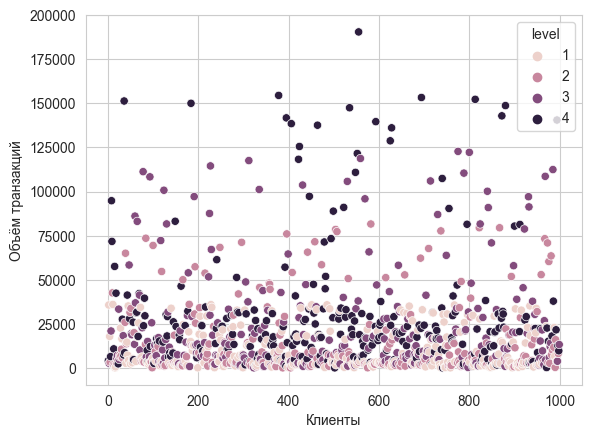

In [44]:
seaborn.scatterplot(df, x = tst['id'], y = tst['объем транзакций в декабре 2022, руб.'],hue='level', sizes='Freedom')
plt.xlabel('Клиенты')
plt.ylabel('Объём транзакций')
#По графику видно, что с уровнем обслуживания равным 1-3 объём транзакций составляет от 0 до 37500 руб, с уровнем равным 4 объём транзакций становится выше. Также можно сказать, что с уровнем 4 объём транзакций является самым большим.
# Из графика можно сделать вывод, что увеличение уровня обслуживания приводит к увеличению объема транзакций.
#Данный вывод может говорить о том, что при более высоком уровне обслуживания клиенты готовы проводить больше транзакций, что может быть связано с повышенными требованиями к качеству сервиса

<Axes: xlabel='пакет обслуживания, уровень', ylabel='объем транзакций в декабре 2022, руб.'>

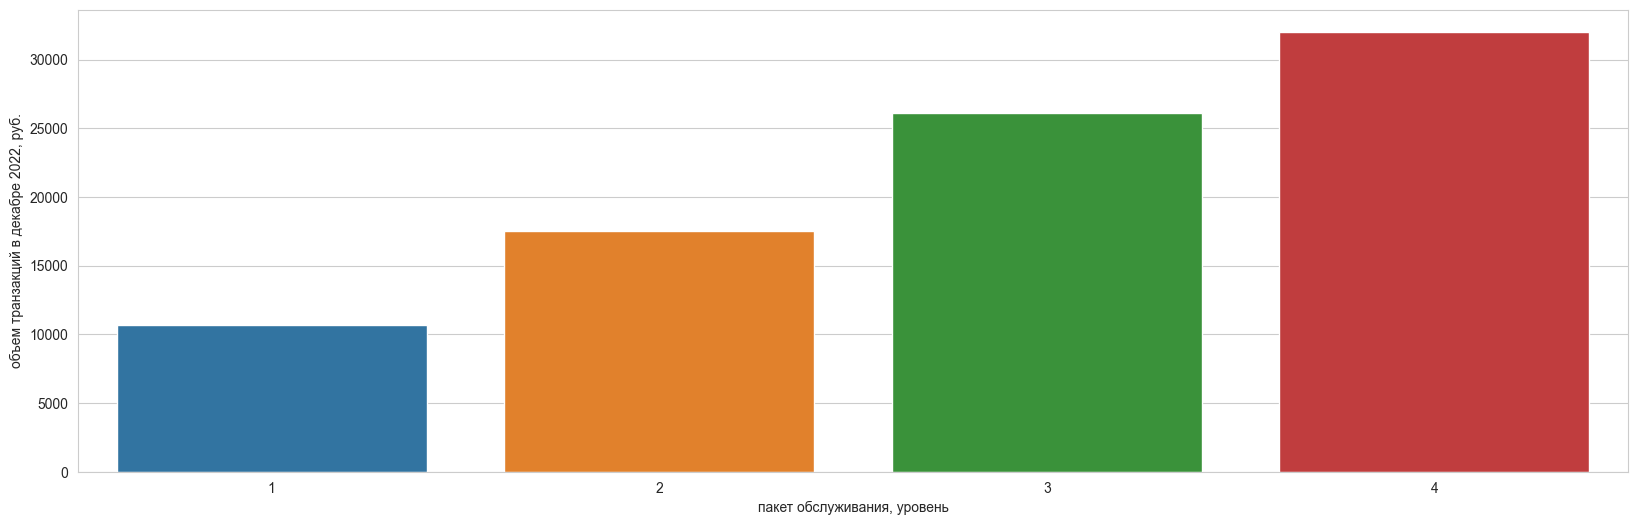

In [45]:
fig, ax = plt.subplots(figsize=(20, 6))
seaborn.barplot(x="пакет обслуживания, уровень",
           y="объем транзакций в декабре 2022, руб.",
           data=tst, errorbar=None )

In [46]:
level_1 = []
level_2 = []
level_3 = []
level_4 = []
for i in range(999):
    if(tst['пакет обслуживания, уровень'][i]==1):
        level_1.append(tst['пакет обслуживания, уровень'][i])
for i in range(999):
    if(tst['пакет обслуживания, уровень'][i]==2):
        level_2.append(tst['пакет обслуживания, уровень'][i])
for i in range(999):
    if(tst['пакет обслуживания, уровень'][i]==3):
        level_3.append(tst['пакет обслуживания, уровень'][i])
for i in range(999):
    if(tst['пакет обслуживания, уровень'][i]==4):
        level_4.append(tst['пакет обслуживания, уровень'][i])
# print(len(level_1))
# print(len(level_2))
# print(len(level_3))
# print(len(level_4))

In [47]:
x = tst.groupby('код региона')['объем транзакций в декабре 2022, руб.'].mean()
x.sort_values(inplace= True)
xorder = x.index.values
x

код региона
24     5652.060000
36     5817.981818
99     5912.238095
85    10440.033333
73    10575.450000
          ...     
60    32077.854167
12    34145.557143
71    38575.051852
96    45648.153846
52    47331.033333
Name: объем транзакций в декабре 2022, руб., Length: 76, dtype: float64

<Axes: xlabel='код региона', ylabel='объем транзакций в декабре 2022, руб.'>

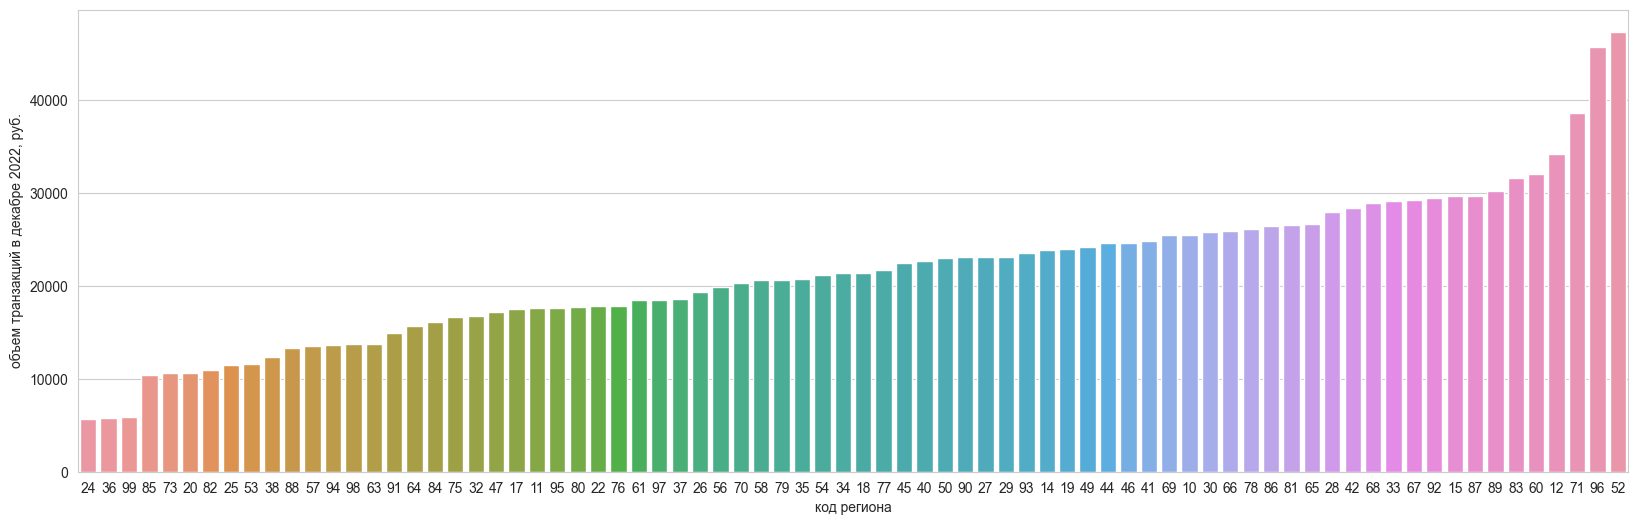

In [48]:
tst.groupby('код региона', as_index=False)
# seaborn.set(rc={'figure.figsize':(12,10)})
fig, ax = plt.subplots(figsize=(20, 6))
seaborn.barplot(x="код региона",
           y="объем транзакций в декабре 2022, руб.",
           data=tst, order= xorder, errorbar=None)


Text(0, 0.5, 'Количество клиентов')

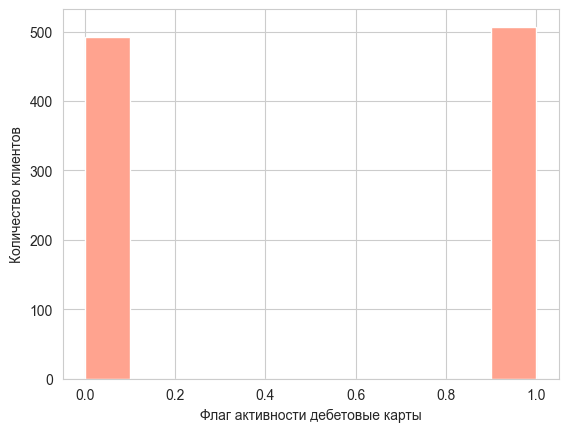

In [49]:
plt.hist(tst['флаг активности дебетовые карты'], color='#ffa38f')
plt.xlabel('Флаг активности дебетовые карты')
plt.ylabel('Количество клиентов')
# Флаг активности дебетовой карты может указывать на то, насколько клиент зависит от банка и как они часто использует его услуги. Разница количества людей для этого критерия небольшая, однако всё равно показатель флага активности дебетовой карты, равным единице, превышает по количеству клиентов.

Text(0, 0.5, 'Количество клиентов')

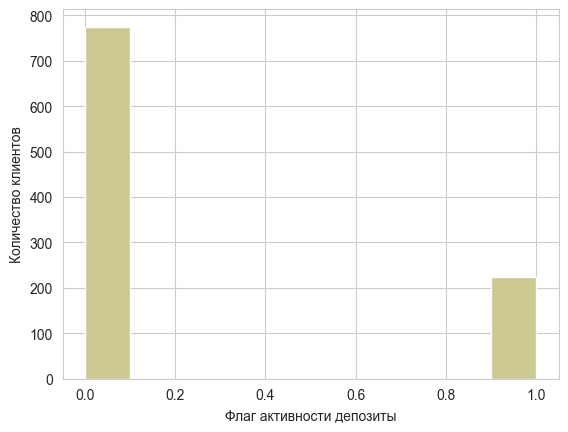

In [50]:
plt.hist(tst['флаг активности депозиты'], color='#ccca91')
plt.xlabel('Флаг активности депозиты')
plt.ylabel('Количество клиентов')
# Большее число клиентов не имеют депозитов в банке. Это может быть связано с тем, что люди не осведомлены, что это и боятся потерять деньги.

In [51]:
max(age)

89